<a href="https://www.kaggle.com/code/caruazu/mnist?scriptVersionId=132424794" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Um clássico do reconhecimento de dígitos

Antes de tudo vamos conhecer nossos dados.

Esse é um exemplo clássico de Aprendizado de Máquina, onde temos que fazer a máquina nos dizer qual número foi escrito.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

imagens_disponiveis = pd.read_csv("../input/digit-recognizer/train.csv")
imagens_disponiveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [2]:
imagens_disponiveis.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Nossos dados de entrada foram organizados assim: cada linha é um exemplo. A primeira coluna informa o número escrito na imagem, e as colunas restantes são os pixels da nossa imagem. As imagens são em preto e branco, quadradas, de tamanho 28 pixels por 28 pixels. Elas foram decompostas, no sentido em que escrevemos, em uma lista de 784 inteiros que representam o quão escuro o pixel é. Variando de 0 até 255

In [3]:
#separando a classificação das imagens

digitos_disponiveis = imagens_disponiveis.pop('label')
digitos_disponiveis.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [4]:
digitos_tipos = digitos_disponiveis.unique()
print(np.sort(digitos_tipos))

[0 1 2 3 4 5 6 7 8 9]


In [5]:
imagens_disponiveis = imagens_disponiveis.astype('float32')
imagens_disponiveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 784 entries, pixel0 to pixel783
dtypes: float32(784)
memory usage: 125.6 MB


In [6]:
imagens_disponiveis = imagens_disponiveis / 255.0

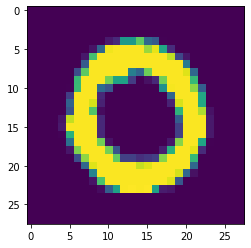

In [7]:
#visualizando as informações

img_numpy =  imagens_disponiveis[1:2].to_numpy()
imagem = img_numpy.reshape(img_numpy.shape[0], 28, 28)

plt.figure()
plt.imshow(imagem[0]) # ,cmap=plt.get_cmap('gray')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

imagens_treino,imagens_teste,digitos_treino,digitos_teste = train_test_split(
    imagens_disponiveis,
    digitos_disponiveis,
    test_size = 0.2, 
    random_state = 42
)

In [9]:
type(digitos_treino[0])

numpy.int64

In [10]:
from keras.utils import np_utils

digitos_treino_categorical = np_utils.to_categorical(digitos_treino, 10)
digitos_teste_categorical = np_utils.to_categorical(digitos_teste, 10)

type(digitos_treino_categorical[0][0])

numpy.float32

# a rede

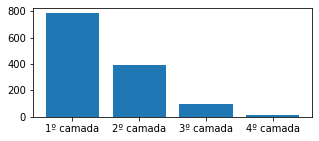

In [11]:
fig, ax = plt.subplots(figsize=(5, 2))
ax.bar(['1º camada', '2º camada', '3º camada', '4º camada'], [784, 392, 98, 10])
plt.show()

In [12]:
# criando a rede

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(392, activation = 'relu', input_shape =(784,)))
model.add(Dense(98, activation = 'relu'))
model.add(Dense(10, activation ='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 392)               307720    
_________________________________________________________________
dense_1 (Dense)              (None, 98)                38514     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                990       
Total params: 347,224
Trainable params: 347,224
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [14]:
historico = model.fit(
    imagens_treino,
    digitos_treino_categorical,
    batch_size = 100,
    epochs=10,
    validation_data=(imagens_teste, digitos_teste_categorical)
)

Epoch 1/10
336/336 [==============================] - 3s 7ms/step - loss: 0.3151 - accuracy: 0.9091 - val_loss: 0.1667 - val_accuracy: 0.9496
Epoch 2/10
336/336 [==============================] - 2s 6ms/step - loss: 0.1152 - accuracy: 0.9654 - val_loss: 0.1280 - val_accuracy: 0.9602
Epoch 3/10
336/336 [==============================] - 2s 6ms/step - loss: 0.0730 - accuracy: 0.9783 - val_loss: 0.1081 - val_accuracy: 0.9682
Epoch 4/10
336/336 [==============================] - 2s 6ms/step - loss: 0.0490 - accuracy: 0.9847 - val_loss: 0.0940 - val_accuracy: 0.9736
Epoch 5/10
336/336 [==============================] - 2s 6ms/step - loss: 0.0361 - accuracy: 0.9890 - val_loss: 0.0903 - val_accuracy: 0.9736
Epoch 6/10
336/336 [==============================] - 2s 6ms/step - loss: 0.0236 - accuracy: 0.9929 - val_loss: 0.1023 - val_accuracy: 0.9711
Epoch 7/10
336/336 [==============================] - 2s 6ms/step - loss: 0.0175 - accuracy: 0.9946 - val_loss: 0.0868 - val_accuracy: 0.9751
Epoch 

In [15]:
teste_erro, teste_acurarica = model.evaluate(imagens_teste, digitos_teste_categorical)

263/263 [==============================] - 1s 3ms/step - loss: 0.0947 - accuracy: 0.9757


In [16]:
print(teste_acurarica)

0.9757142663002014


# Submetendo resultados

In [17]:
imagens_avaliacao = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
imagens_avaliacao = imagens_avaliacao.astype('float32')
imagens_avaliacao = imagens_avaliacao / 255.0

digitos_resultantes = model.predict(imagens_avaliacao)
digitos_resultantes = np.argmax(digitos_resultantes, axis=1)

resultados_df = pd.DataFrame(
    {
        'ImageId': range(1, len(digitos_resultantes)+1),
        'Label': digitos_resultantes
    }
)
resultados_df.to_csv('submission.csv', index=False)

# entendendo os resultados

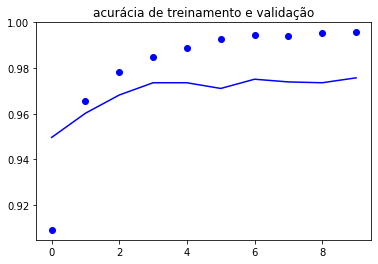

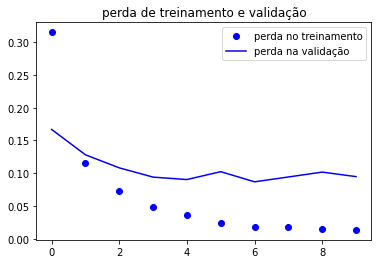

In [18]:
acc = historico.history['accuracy']
val_acc = historico.history['val_accuracy']
loss = historico.history['loss']
val_loss = historico.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='acurácia no treinamento')
plt.plot(epochs, val_acc, 'b', label='acurácia na validação')
plt.title('acurácia de treinamento e validação')

plt.figure()

plt.plot(epochs, loss, 'bo', label='perda no treinamento')
plt.plot(epochs, val_loss, 'b', label='perda na validação')
plt.title('perda de treinamento e validação')
plt.legend()

plt.show()

# Continua ...